# Keystroke Dynamics (SVM)
###### Vitor Scheffer

In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Carrega os dados
data = pd.read_csv("DSL-StrongPasswordData.csv", header = 0)

In [3]:
# Reinicia o index
data = data.reset_index()

In [19]:
# Pega os IDs unicos campo 'subject'
unisub = list(data['subject'].unique())

In [20]:
# Cria ID numerico sequencial
mlist = [int(x) for x in range(len(unisub))]

In [21]:
# Vincula o Id numerico com o campo 'subject'
newvalue = dict(zip(unisub, mlist))

In [22]:
# Exibe dados tratados
data['subject'] = data['subject'].map(newvalue)
data.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0,0,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,1,0,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,2,0,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,3,0,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,4,0,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [23]:
# Divide o conjunto de dados utilizando a proporção 80:20
train, test = train_test_split(data, test_size = 0.2)

In [25]:
# Dados de teste
train.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
10638,10638,26,5,39,0.0905,1.1613,1.0708,0.0736,0.2303,0.1567,...,0.1163,0.1746,0.0583,0.0836,0.8109,0.7273,0.0973,0.2393,0.1420,0.1055
3796,3796,9,4,47,0.0681,0.0836,0.0155,0.0671,0.1070,0.0399,...,0.1064,0.0787,-0.0277,0.0526,0.1439,0.0913,0.0705,0.2081,0.1376,0.0597
5864,5864,14,6,15,0.0882,0.2069,0.1187,0.0882,0.2722,0.1840,...,0.1127,0.2033,0.0906,0.0729,0.2457,0.1728,0.0853,0.4230,0.3377,0.0884
3902,3902,9,7,3,0.0723,0.0799,0.0076,0.0681,0.1162,0.0481,...,0.0901,0.0835,-0.0066,0.0674,0.1262,0.0588,0.0702,0.1669,0.0967,0.0760
18658,18658,46,6,9,0.0491,0.3860,0.3369,0.0317,0.0726,0.0409,...,0.1108,0.0668,-0.0440,0.1014,0.0889,-0.0125,0.1045,0.2123,0.1078,0.0699


In [26]:
# Exibe dados de teste
test.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
14535,14535,36,3,36,0.1142,0.2945,0.1803,0.0615,0.1530,0.0915,...,0.0776,0.1386,0.0610,0.1598,0.1284,-0.0314,0.1292,0.3208,0.1916,0.1422
3284,3284,8,2,35,0.1074,0.1271,0.0197,0.1016,0.1510,0.0494,...,0.2249,0.1254,-0.0995,0.1157,0.0937,-0.0220,0.1619,0.2990,0.1371,0.1312
15524,15524,38,7,25,0.0931,0.3549,0.2618,0.0678,0.1498,0.0820,...,0.0815,0.1499,0.0684,0.0591,0.1952,0.1361,0.0702,0.2006,0.1304,0.0794
9191,9191,22,8,42,0.0679,0.2161,0.1482,0.0539,0.1138,0.0599,...,0.0715,0.0953,0.0238,0.0578,0.1710,0.1132,0.0557,0.2284,0.1727,0.0665
336,336,0,7,37,0.1190,0.3000,0.1810,0.0781,0.1275,0.0494,...,0.0990,0.0945,-0.0045,0.0956,0.1975,0.1019,0.1035,0.2076,0.1041,0.0837


# Visualização

In [27]:
#lets visualize the data to get a deeper insights
import matplotlib.pyplot as plt

DD time :: [Min , Max] [ 0.0187 12.5061 ]


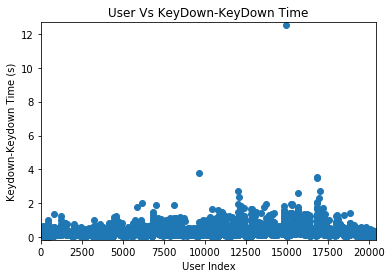

In [29]:
#plot: User vs Keydown-Keydown Time
#down time = the time from when key1 was pressed to when key2 was pressed
#DD time = H time + UD time
print('DD time :: [Min , Max] ', end='')
print('[', min(train.loc[:, 'DD.period.t']), max(train.loc[:, 'DD.period.t']), ']')
x = train.loc[:, 'index']
y = train.loc[:, 'DD.period.t']
plt.ylim(min(train.loc[:, 'DD.period.t']), max(train.loc[:, 'DD.period.t']))
plt.scatter(x, y)
plt.autoscale(tight=True)
plt.title('User Vs KeyDown-KeyDown Time')
plt.ylabel('Keydown-Keydown Time (s)')
plt.xlabel('User Index')
plt.show()

UD time :: [Min , Max] [ -0.2358 12.4517 ]


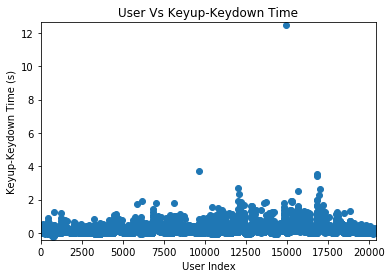

In [30]:
#plot: User vs Keyup-Keydown Time
#up-down time = the time from when key1 was released to when key2 was pressed
print('UD time :: [Min , Max] ', end='')
print('[', min(train.loc[:, 'UD.period.t']), max(train.loc[:, 'UD.period.t']), ']')
x = train.loc[:, 'index']
y = train.loc[:, 'UD.period.t']
plt.ylim(min(train.loc[:, 'UD.period.t']), max(train.loc[:, 'UD.period.t']))
plt.scatter(x, y)
plt.autoscale(tight = True)
plt.title('User Vs Keyup-Keydown Time')
plt.ylabel('Keyup-Keydown Time (s)')
plt.xlabel('User Index')
plt.show()

H time :: [Min , Max] [ 0.0014 0.3761 ]


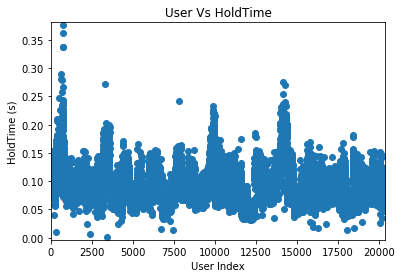

In [31]:
#plot: User vs HoldTime
#hold time = the time from when key was pressed to when it was released
print('H time :: [Min , Max] ', end='')
print('[', min(train.loc[:, 'H.period']), max(train.loc[:, 'H.period']), ']')
x = train.loc[:, 'index']
y = train.loc[:, 'H.period']
plt.ylim(min(train.loc[:, 'H.period']), max(train.loc[:, 'H.period']))
plt.scatter(x, y)
plt.autoscale(tight = True)
plt.title('User Vs HoldTime')
plt.ylabel('HoldTime (s)')
plt.xlabel('User Index')
plt.show()

In [32]:
train.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
10638,10638,26,5,39,0.0905,1.1613,1.0708,0.0736,0.2303,0.1567,...,0.1163,0.1746,0.0583,0.0836,0.8109,0.7273,0.0973,0.2393,0.1420,0.1055
3796,3796,9,4,47,0.0681,0.0836,0.0155,0.0671,0.1070,0.0399,...,0.1064,0.0787,-0.0277,0.0526,0.1439,0.0913,0.0705,0.2081,0.1376,0.0597
5864,5864,14,6,15,0.0882,0.2069,0.1187,0.0882,0.2722,0.1840,...,0.1127,0.2033,0.0906,0.0729,0.2457,0.1728,0.0853,0.4230,0.3377,0.0884
3902,3902,9,7,3,0.0723,0.0799,0.0076,0.0681,0.1162,0.0481,...,0.0901,0.0835,-0.0066,0.0674,0.1262,0.0588,0.0702,0.1669,0.0967,0.0760
18658,18658,46,6,9,0.0491,0.3860,0.3369,0.0317,0.0726,0.0409,...,0.1108,0.0668,-0.0440,0.1014,0.0889,-0.0125,0.1045,0.2123,0.1078,0.0699


H time (a) :: [Min , Max] [ 0.004 2.0353 ]
H time (l) :: [Min , Max] [ 0.0061 0.3407 ]
H time (5) :: [Min , Max] [ 0.0014 0.1989 ]


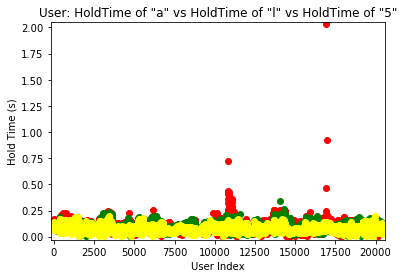

In [33]:
#plot: for each user -> HoldTime(a) vs HoldTime(l) vs HoldTime(5)
#right side key vs left side key
#hold time = the time from when key was pressed to when it was released
print('H time (a) :: [Min , Max] ', end='')
print('[',min(train.loc[:, 'H.a']), max(train.loc[:, 'H.a']),']')
x = train.loc[:, 'index']
y = train.loc[:, 'H.a']

print('H time (l) :: [Min , Max] ', end='')
print('[',min(train.loc[:, 'H.l']), max(train.loc[:, 'H.l']),']')
y1 = train.loc[:, 'H.l']

print('H time (5) :: [Min , Max] ', end='')
print('[',min(train.loc[:, 'H.five']), max(train.loc[:, 'H.five']),']')
y2 = train.loc[:, 'H.five']

plt.scatter(x, y, color = 'red') #left -side
plt.scatter(x, y1, color = 'green') #right-side
plt.scatter(x, y2, color = 'yellow') #number

plt.autoscale(tight = True)
plt.xlabel('User Index')
plt.ylabel('Hold Time (s)')
plt.title('User: HoldTime of "a" vs HoldTime of "l" vs HoldTime of "5"')
plt.show()

H time (Return) :: [Min , Max] [ 0.0029 0.2651 ]


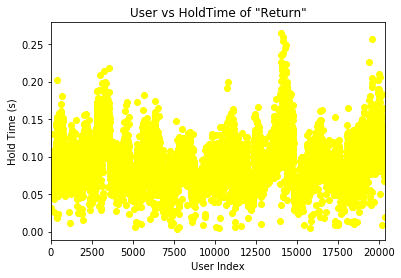

In [34]:
#plot: User vs HoldTime(Return[Enter])
#hold time = the time from when key was pressed to when it was released
print('H time (Return) :: [Min , Max] ', end='')
print('[',min(train.loc[:, 'H.Return']), max(train.loc[:, 'H.Return']),']')
x = train.loc[:, 'index']
y = train.loc[:, 'H.Return']
plt.scatter(x, y, color = 'yellow')
plt.autoscale(tight = True)
plt.xlabel('User Index')
plt.ylabel('Hold Time (s)')
plt.title('User vs HoldTime of "Return"')
plt.show()

H time (a) :: [Min , Max] [ 0.004 2.0353 ]
H time (l) :: [Min , Max] [ 0.0061 0.3407 ]
H time (n) :: [Min , Max] [ 0.004 0.3452 ]
H time (t) :: [Min , Max] [ 0.0093 0.2411 ]


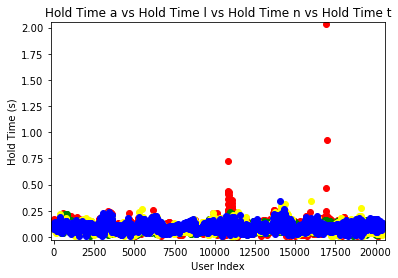

In [35]:
#plot: Hold Time for a, l , n, t
print('H time (a) :: [Min , Max] [', min(train.loc[:, 'H.a']), max(train.loc[:, 'H.a']),']')
print('H time (l) :: [Min , Max] [', min(train.loc[:, 'H.l']), max(train.loc[:, 'H.l']),']')
print('H time (n) :: [Min , Max] [', min(train.loc[:, 'H.n']), max(train.loc[:, 'H.n']),']')
print('H time (t) :: [Min , Max] [', min(train.loc[:, 'H.t']), max(train.loc[:, 'H.t']),']')
x1 = train.loc[:, 'index']
y1 = train.loc[:, 'H.a']
y2 = train.loc[:, 'H.l']
y3 = train.loc[:, 'H.n']
y4 = train.loc[:, 'H.t']
plt.scatter(x1, y1, color = 'red')
plt.scatter(x, y4, color = 'green')
plt.scatter(x, y3, color = 'yellow')
plt.scatter(x1, y2, color = 'blue')
plt.title('Hold Time a vs Hold Time l vs Hold Time n vs Hold Time t')
plt.xlabel('User Index')
plt.ylabel('Hold Time (s)')
plt.autoscale(tight = True)
plt.show()

# Learning the Data Model

In [36]:
#learn a svm model on the analysed data
#view of the data right now
train.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
10638,10638,26,5,39,0.0905,1.1613,1.0708,0.0736,0.2303,0.1567,...,0.1163,0.1746,0.0583,0.0836,0.8109,0.7273,0.0973,0.2393,0.1420,0.1055
3796,3796,9,4,47,0.0681,0.0836,0.0155,0.0671,0.1070,0.0399,...,0.1064,0.0787,-0.0277,0.0526,0.1439,0.0913,0.0705,0.2081,0.1376,0.0597
5864,5864,14,6,15,0.0882,0.2069,0.1187,0.0882,0.2722,0.1840,...,0.1127,0.2033,0.0906,0.0729,0.2457,0.1728,0.0853,0.4230,0.3377,0.0884
3902,3902,9,7,3,0.0723,0.0799,0.0076,0.0681,0.1162,0.0481,...,0.0901,0.0835,-0.0066,0.0674,0.1262,0.0588,0.0702,0.1669,0.0967,0.0760
18658,18658,46,6,9,0.0491,0.3860,0.3369,0.0317,0.0726,0.0409,...,0.1108,0.0668,-0.0440,0.1014,0.0889,-0.0125,0.1045,0.2123,0.1078,0.0699


In [37]:
train['index'].head()

10638    10638
3796      3796
5864      5864
3902      3902
18658    18658
Name: index, dtype: int64

In [38]:
train['subject'].head()

10638    26
3796      9
5864     14
3902      9
18658    46
Name: subject, dtype: int64

In [39]:
train['sessionIndex'].head()

10638    5
3796     4
5864     6
3902     7
18658    6
Name: sessionIndex, dtype: int64

In [40]:
train['H.period'].head()

10638    0.0905
3796     0.0681
5864     0.0882
3902     0.0723
18658    0.0491
Name: H.period, dtype: float64

In [41]:
#training data
train.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
10638,10638,26,5,39,0.0905,1.1613,1.0708,0.0736,0.2303,0.1567,...,0.1163,0.1746,0.0583,0.0836,0.8109,0.7273,0.0973,0.2393,0.1420,0.1055
3796,3796,9,4,47,0.0681,0.0836,0.0155,0.0671,0.1070,0.0399,...,0.1064,0.0787,-0.0277,0.0526,0.1439,0.0913,0.0705,0.2081,0.1376,0.0597
5864,5864,14,6,15,0.0882,0.2069,0.1187,0.0882,0.2722,0.1840,...,0.1127,0.2033,0.0906,0.0729,0.2457,0.1728,0.0853,0.4230,0.3377,0.0884
3902,3902,9,7,3,0.0723,0.0799,0.0076,0.0681,0.1162,0.0481,...,0.0901,0.0835,-0.0066,0.0674,0.1262,0.0588,0.0702,0.1669,0.0967,0.0760
18658,18658,46,6,9,0.0491,0.3860,0.3369,0.0317,0.0726,0.0409,...,0.1108,0.0668,-0.0440,0.1014,0.0889,-0.0125,0.1045,0.2123,0.1078,0.0699


In [42]:
#import the ml package
from sklearn import svm
from sklearn import metrics

# SENHA DIGITADA: .tie5Roanl

### H - Tempo de tecla pressionada
### DD - Tempo tecla pressionada ate nova tecla pressionada
### UD - Tempo tecla liberada ate nova tecla pressionada

In [43]:
#set the feaures for learnign the model
features = list(train.columns[2:])
#features

In [35]:
#training feature and target
x = train[features]
y = train['subject']

In [36]:
#define a linear model using svm classifier
model = svm.SVC(kernel='linear', C=1).fit(x, y)

In [37]:
#get the test data
test.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
2529,2529,6,3,30,0.0771,0.1269,0.0498,0.0607,0.1264,0.0657,...,0.0496,0.0871,0.0375,0.0758,0.3278,0.2520,0.0731,0.1902,0.1171,0.0555
4507,4507,11,3,8,0.0818,0.4058,0.3240,0.0639,0.2481,0.1842,...,0.0718,0.2864,0.2146,0.0842,0.2869,0.2027,0.0668,0.3242,0.2574,0.0673
15981,15981,39,8,32,0.1198,0.3117,0.1919,0.0873,0.1691,0.0818,...,0.1424,0.1216,-0.0208,0.0902,0.1754,0.0852,0.1045,0.3040,0.1995,0.1084
15885,15885,39,6,36,0.0823,0.3270,0.2447,0.0557,0.1409,0.0852,...,0.0923,0.1121,0.0198,0.0900,0.2208,0.1308,0.0876,0.3525,0.2649,0.0739
899,899,2,2,50,0.1074,0.1733,0.0659,0.0932,0.1368,0.0436,...,0.1315,0.1350,0.0035,0.1082,0.2021,0.0939,0.1090,0.2617,0.1527,0.0892


In [38]:
x_test = test[features]
y_test = test['subject']
# predict the output using the test data on the learned model
predicted_output = model.predict(x_test)

In [39]:
# use matrics to check the accuracy on the predicted output 
model_accuracy = metrics.accuracy_score(test['subject'], predicted_output)
model_accuracy

0.7686274509803922